# Momentum Logic

A common modification to stochastic gradient descent is to add a momentum term. We update the parameters with a weighted combination of the gradient computed from the current batch and the direction moved in the previous step:

$$m_{t+1} \leftarrow \beta \cdot m_t + (1 - \beta) \sum_{i \in \mathcal{B}_t} \frac{\partial \ell_i(\phi_t)}{\partial \phi}$$

$$\phi_{t+1} \leftarrow \phi_t - \alpha \cdot m_{t+1}$$

where:
- $m_t$: the momentum (which drives the update at iteration $t$)
- $\beta \in [0, 1)$: controls the degree to which the gradient is smoothed over time
- $\alpha$: learning rate

The recursive formulation of the momentum calculation means that the gradient step is an infinite weighted sum of all the previous gradients, where the weights get smaller as we move back in time. The effective learning rate increases if all these gradients are aligned over multiple iterations but decreases if the gradient direction repeatedly changes as the terms in the sum cancel out. The overall effect is a smoother trajectory and reduced oscillatory behavior in valleys.

The momentum term can be considered a coarse prediction of where the SGD algorithm Momentum will move next. Nesterov accelerated momentum computes the gradients at this predicted point rather than at the current point:

$$m_{t+1} \leftarrow \beta \cdot m_t + (1 - \beta) \sum_{i \in \mathcal{B}_t} \frac{\partial \ell_i(\phi_t - \alpha \cdot m_t)}{\partial \phi}$$

$$\phi_{t+1} \leftarrow \phi_t - \alpha \cdot m_{t+1}$$

where:

- $\phi_t - \alpha \cdot m_{t+1}$:  the gradients are evaluated at

Momentum helps in accelerating the SGD in the relevant direction and dampens the oscillations. It does this by adding a fraction of the update vector of the past step to the current update vector.



In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap

In [18]:
def UpdateParameterMomentum(phi:float,gradient:float,mt:float,beta:float=0.9,alpha:float=0.01)->tuple:
    # Update momentum
    mt_next = beta*mt+(1-beta)*gradient
    # Update parameter
    phi_next = phi-alpha*mt_next
    return phi_next,mt_next

In [19]:
# Example usage
phi = 0.5  # Initial parameter
mt = 0  # Initial momentum
beta = 0.9
alpha = 0.01
for step in range(1, 101):
    gradient = -0.5  # Dummy gradient for demonstration
    phi,mt = UpdateParameterMomentum(phi,gradient,mt,beta,alpha)
    if step % 20 == 0:
        print(f'Step {step}: Parameter value: {phi} | Momentum: {mt}')

Step 20: Parameter value: 0.5604709494565756 | Momentum: -0.43921167270471534
Step 40: Parameter value: 0.6556651397323644 | Momentum: -0.4926095585292827
Step 60: Parameter value: 0.755080865463496 | Momentum: -0.4991014948500428
Step 80: Parameter value: 0.8550098313525236 | Momentum: -0.49989076274973576
Step 100: Parameter value: 0.9550011952629499 | Momentum: -0.49998671930055616


- example:

In [23]:
houseSize = np.array(
    [650,785,920,1200,1400]
) # in square feet
housePrice = np.array(
    [300000,350000,400000,480000,530000]
) # in USD
print(f"Sample shape: {houseSize.shape}")
print(f"Ground Truth shape: {housePrice.shape}")

Sample shape: (5,)
Ground Truth shape: (5,)


In [24]:
# Normalizing the data
houseSizeNormal = (houseSize-houseSize.mean())/houseSize.std()
housePriceNormal = (housePrice-housePrice.mean())/housePrice.std()

In [25]:
# Initialization
theta_0 = 0
theta_1 = 0
momentum_0 = 0
momentum_1 = 0
alpha = 0.01 # Learning rate
beta = 0.9 # Momentum coefficient
epochs = 1000

In [26]:
for epc in range(epochs):
  prediction = theta_0+theta_1*houseSizeNormal
  errors = prediction-housePriceNormal
  gradient_0 = errors.mean()
  gradient_1 = (errors*houseSizeNormal).mean()
  momentum_0 = beta*momentum_0+(1-beta)*gradient_0
  momentum_1 = beta*momentum_1+(1-beta)*gradient_1
  theta_0 -= alpha*momentum_0
  theta_1 -= alpha*momentum_1
  if epc % 100 == 0:
    loss = np.square(errors).mean()
    print(f"Epoch: {epc} --> Loss: {loss}")

Epoch: 0 --> Loss: 1.0
Epoch: 100 --> Loss: 0.14134140048007382
Epoch: 200 --> Loss: 0.020719146005453833
Epoch: 300 --> Loss: 0.007849172063204884
Epoch: 400 --> Loss: 0.006476077887914855
Epoch: 500 --> Loss: 0.006329582829503718
Epoch: 600 --> Loss: 0.006313953310039576
Epoch: 700 --> Loss: 0.006312285800696059
Epoch: 800 --> Loss: 0.0063121078945603554
Epoch: 900 --> Loss: 0.006312088913801273


In [27]:
print(f"Optimized Parameters:\n{theta_0} | {theta_1}")

Optimized Parameters:
5.567596387943959e-17 | 0.9968234088768895


- complex example:

In [29]:
sample = np.array(
    [
        [-1.920e+00,-1.422e+01,1.490e+00,-1.940e+00,-2.389e+00,-5.090e+00,
         -8.861e+00,3.578e+00,-6.010e+00,-6.995e+00,3.634e+00,8.743e-01,
         -1.096e+01,4.073e-01,-9.467e+00,8.560e+00,1.062e+01,-1.729e-01,
         1.040e+01,-1.261e+01,1.574e-01,-1.304e+01,-2.156e+00,-1.210e+01,
         -1.119e+01,2.902e+00,-8.220e+00,-1.179e+01,-8.391e+00,-4.505e+00],
        [-1.051e+00,-2.482e-02,8.896e-01,-4.943e-01,-9.371e-01,4.306e-01,
         9.577e-03,-7.944e-02 ,1.624e-01,-2.682e-01,-3.129e-01,8.303e-01,
         -2.365e-02,5.098e-01,-2.777e-01,3.367e-01,1.927e-01,-2.222e-01,
         6.352e-02,6.888e-03,3.224e-02,1.091e-02,-5.706e-01,-5.258e-02,
         -3.666e-02,1.709e-01,-4.805e-02,2.008e-01,-1.904e-01,5.952e-01]
    ]
)
print(f"Sample shape: {sample.shape}")

Sample shape: (2, 30)


In [30]:
def ModelPrediction(phiValues:np.ndarray,sample:np.ndarray)->np.ndarray:
  sinComponent = np.sin(phiValues[0]+0.06*phiValues[1]*sample)
  gaussComponent = np.exp(-(phiValues[0]+0.06*phiValues[1]*sample)*(phiValues[0]+0.06*phiValues[1]*sample)/32)
  prediction = sinComponent*gaussComponent
  return prediction

In [33]:
def DrawModel(data:np.ndarray,model,phiValues:np.ndarray,title:None=None)->None:
  xModel = np.arange(-15,15,0.1)
  yModel = ModelPrediction(phiValues,xModel)
  figure,axs = plt.subplots(figsize=(8,8))
  axs.plot(data[0,:],data[1,:],"bo",label="Main Data")
  axs.plot(xModel,yModel,"m-",label="Model Prediction")
  axs.set_xlim([-15,15])
  axs.set_ylim([-1,1])
  axs.set_xlabel("x")
  axs.set_ylabel("y")
  if title is not None:
    axs.set_title(title)
  plt.tight_layout()
  plt.legend()
  plt.show()


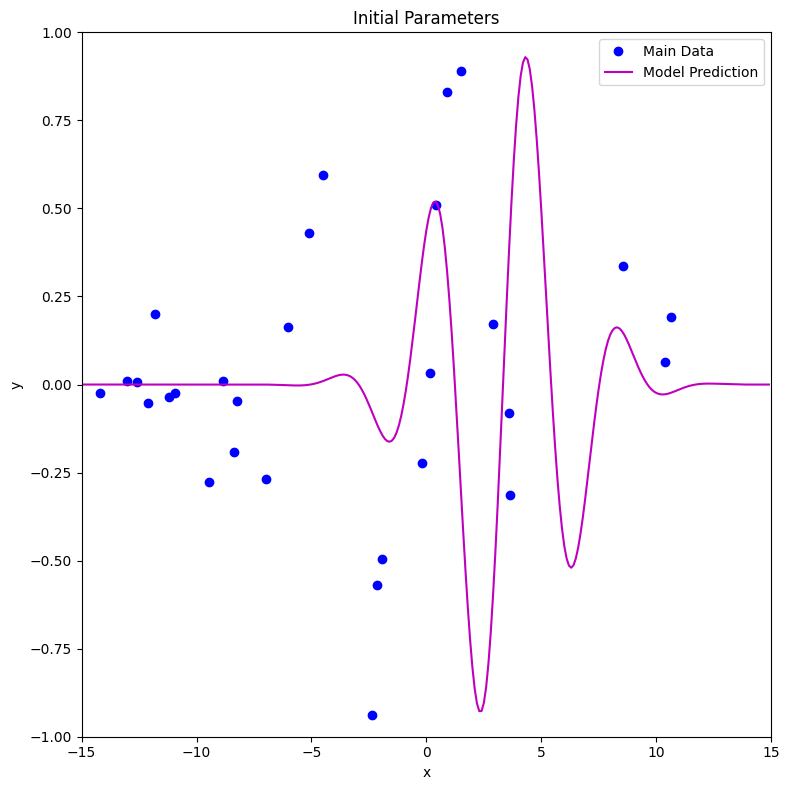

In [34]:
phi = np.zeros((2,1))
phi[0] = -5
phi[1] = 25
DrawModel(sample,ModelPrediction,phi,"Initial Parameters")

In [35]:
def ComputeLoss(sample:np.ndarray,groundTruth:np.ndarray,model,phiValues:np.ndarray)->np.ndarray:
  prediction = ModelPrediction(phiValues,sample)
  loss = np.sum((prediction-groundTruth)**2)
  return loss

In [41]:
def DrawLossFunctions(computeLoss,sample:np.ndarray,model,phiIterations:None=None)->None:
  colorHex = ('2a0902', '2b0a03', '2c0b04', '2d0c05', '2e0c06', '2f0d07', '300d08', '310e09', '320f0a', '330f0b', '34100b', '35110c', '36110d', '37120e', '38120f', '39130f', '3a1410', '3b1411', '3c1511', '3d1612', '3e1613', '3f1713', '401714', '411814', '421915', '431915', '451a16', '461b16', '471b17', '481c17', '491d18', '4a1d18', '4b1e19', '4c1f19', '4d1f1a', '4e201b', '50211b', '51211c', '52221c', '53231d', '54231d', '55241e', '56251e', '57261f', '58261f', '592720', '5b2821', '5c2821', '5d2922', '5e2a22', '5f2b23', '602b23', '612c24', '622d25', '632e25', '652e26', '662f26', '673027', '683027', '693128', '6a3229', '6b3329', '6c342a', '6d342a', '6f352b', '70362c', '71372c', '72372d', '73382e', '74392e', '753a2f', '763a2f', '773b30', '783c31', '7a3d31', '7b3e32', '7c3e33', '7d3f33', '7e4034', '7f4134', '804235', '814236', '824336', '834437', '854538', '864638', '874739', '88473a', '89483a', '8a493b', '8b4a3c', '8c4b3c', '8d4c3d', '8e4c3e', '8f4d3f', '904e3f', '924f40', '935041', '945141', '955242', '965343', '975343', '985444', '995545', '9a5646', '9b5746', '9c5847', '9d5948', '9e5a49', '9f5a49', 'a05b4a', 'a15c4b', 'a35d4b', 'a45e4c', 'a55f4d', 'a6604e', 'a7614e', 'a8624f', 'a96350', 'aa6451', 'ab6552', 'ac6552', 'ad6653', 'ae6754', 'af6855', 'b06955', 'b16a56', 'b26b57', 'b36c58', 'b46d59', 'b56e59', 'b66f5a', 'b7705b', 'b8715c', 'b9725d', 'ba735d', 'bb745e', 'bc755f', 'bd7660', 'be7761', 'bf7862', 'c07962', 'c17a63', 'c27b64', 'c27c65', 'c37d66', 'c47e67', 'c57f68', 'c68068', 'c78169', 'c8826a', 'c9836b', 'ca846c', 'cb856d', 'cc866e', 'cd876f', 'ce886f', 'ce8970', 'cf8a71', 'd08b72', 'd18c73', 'd28d74', 'd38e75', 'd48f76', 'd59077', 'd59178', 'd69279', 'd7937a', 'd8957b', 'd9967b', 'da977c', 'da987d', 'db997e', 'dc9a7f', 'dd9b80', 'de9c81', 'de9d82', 'df9e83', 'e09f84', 'e1a185', 'e2a286', 'e2a387', 'e3a488', 'e4a589', 'e5a68a', 'e5a78b', 'e6a88c', 'e7aa8d', 'e7ab8e', 'e8ac8f', 'e9ad90', 'eaae91', 'eaaf92', 'ebb093', 'ecb295', 'ecb396', 'edb497', 'eeb598', 'eeb699', 'efb79a', 'efb99b', 'f0ba9c', 'f1bb9d', 'f1bc9e', 'f2bd9f', 'f2bfa1', 'f3c0a2', 'f3c1a3', 'f4c2a4', 'f5c3a5', 'f5c5a6', 'f6c6a7', 'f6c7a8', 'f7c8aa', 'f7c9ab', 'f8cbac', 'f8ccad', 'f8cdae', 'f9ceb0', 'f9d0b1', 'fad1b2', 'fad2b3', 'fbd3b4', 'fbd5b6', 'fbd6b7', 'fcd7b8', 'fcd8b9', 'fcdaba', 'fddbbc', 'fddcbd', 'fddebe', 'fddfbf', 'fee0c1', 'fee1c2', 'fee3c3', 'fee4c5', 'ffe5c6', 'ffe7c7', 'ffe8c9', 'ffe9ca', 'ffebcb', 'ffeccd', 'ffedce', 'ffefcf', 'fff0d1', 'fff2d2', 'fff3d3', 'fff4d5', 'fff6d6', 'fff7d8', 'fff8d9', 'fffada', 'fffbdc', 'fffcdd', 'fffedf', 'ffffe0')
  colorDec = np.array([int(element,base=16) for element in colorHex])
  r = np.floor(colorDec/(256**2))
  g = np.floor((colorDec-r*256**2)/256)
  b = np.floor(colorDec-r*256**2-g*256)
  colormap = ListedColormap(np.vstack((r,g,b)).transpose()/255.0)
  offsetMesh,freqsMesh = np.meshgrid(
      np.arange(-10,10,0.1),
      np.arange(2.5,22.5,0.1)
  )
  lossMesh = np.zeros_like(freqsMesh)
  for idSlope,slope in np.ndenumerate(freqsMesh):
    lossMesh[idSlope] = ComputeLoss(sample[0,:],sample[1,:],model,np.array([[offsetMesh[idSlope]],[slope]]))
  figure,axs = plt.subplots(figsize=(8,8))
  figure.set_size_inches(8,8)
  axs.contourf(offsetMesh,freqsMesh,lossMesh,256,cmap=colormap)
  axs.contour(offsetMesh,freqsMesh,lossMesh,20,colors=["#80808080"])
  if phiIterations is not None:
    axs.plot(phiIterations[0,:],phiIterations[1,:],"go-")
  axs.set_ylim([2.5,22.5])
  axs.set_xlabel("Offset $\phi_0$")
  axs.set_ylabel("Frequency $\phi_1$")
  plt.tight_layout()
  plt.show()

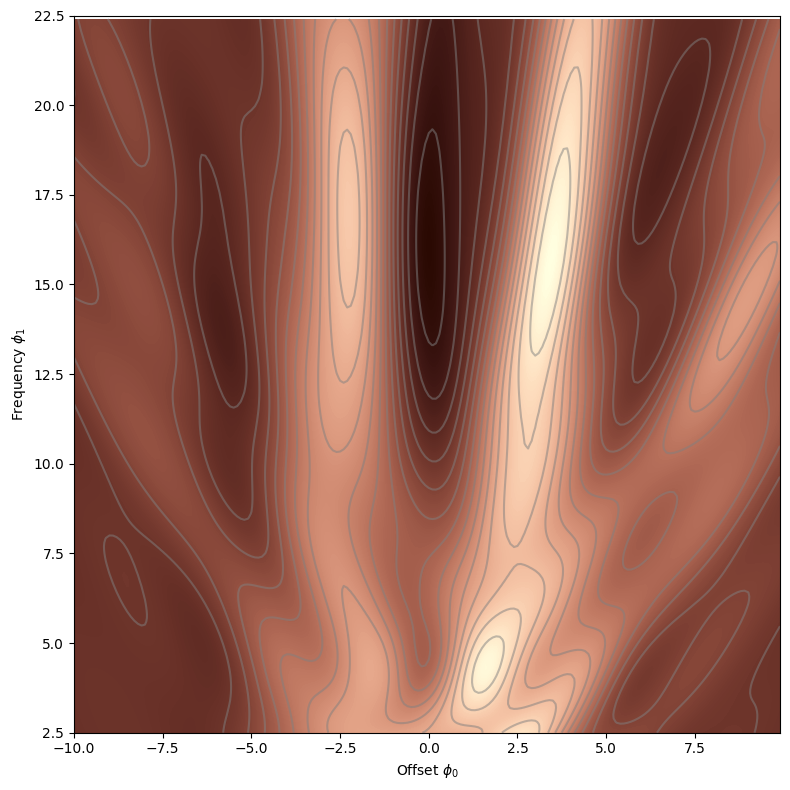

In [42]:
DrawLossFunctions(ComputeLoss,sample,ModelPrediction)

In [44]:
def GaborDerivationPhi_0(sample:np.ndarray,groundTruth:np.ndarray,phi_0:int|float,phi_1:int|float)->int|float:
  x = 0.06*phi_1*sample+phi_0
  cosComponent = np.cos(x)
  sinComponent = np.sin(x)
  gaussComponent = np.exp(-0.5*sample**2/16)
  derivation = cosComponent*gaussComponent-sinComponent*gaussComponent*sample/16
  derivation = 2*derivation*(sinComponent*gaussComponent-groundTruth)
  return np.sum(derivation)

In [45]:
def GaborDerivationPhi_1(sample:np.ndarray,groundTruth:np.ndarray,phi_0:int|float,phi_1:int|float)->int|float:
  x = 0.06*phi_1*sample+phi_0
  cosComponent = np.cos(x)
  sinComponent = np.sin(x)
  gaussComponent = np.exp(-0.5*sample**2/16)
  derivation = 0.06*sample*cosComponent*gaussComponent-0.06*sample*sinComponent*gaussComponent*sample/16
  derivation = 2*derivation*(sinComponent*gaussComponent-groundTruth)
  return np.sum(derivation)

In [46]:
def ComputeGradient(sample:np.ndarray,groundTruth:np.ndarray,phiValues:np.ndarray)->np.ndarray:
  derPhi_0 = GaborDerivationPhi_0(sample,groundTruth,phiValues[0],phiValues[1])
  derPhi_1 = GaborDerivationPhi_1(sample,groundTruth,phiValues[0],phiValues[1])
  return np.array([[derPhi_0],[derPhi_1]])

In [52]:
np.random.seed(1)
steps = 20
batchSize = 5
alpha = 0.6
phiAll = np.zeros((2,steps+1))
phiAll[0,0] = -1.5
phiAll[1,0] = 6.5

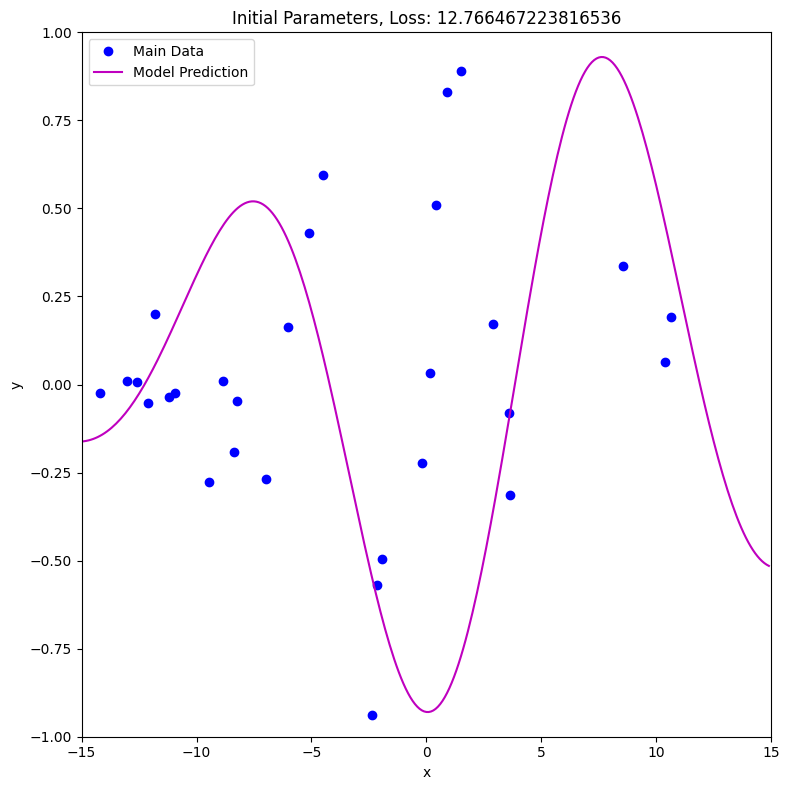

In [53]:
loss = ComputeLoss(sample[0,:],sample[1,:],ModelPrediction,phiAll[:,0:1])
DrawModel(sample,ModelPrediction,phiAll[:,0:1],f"Initial Parameters, Loss: {loss}")

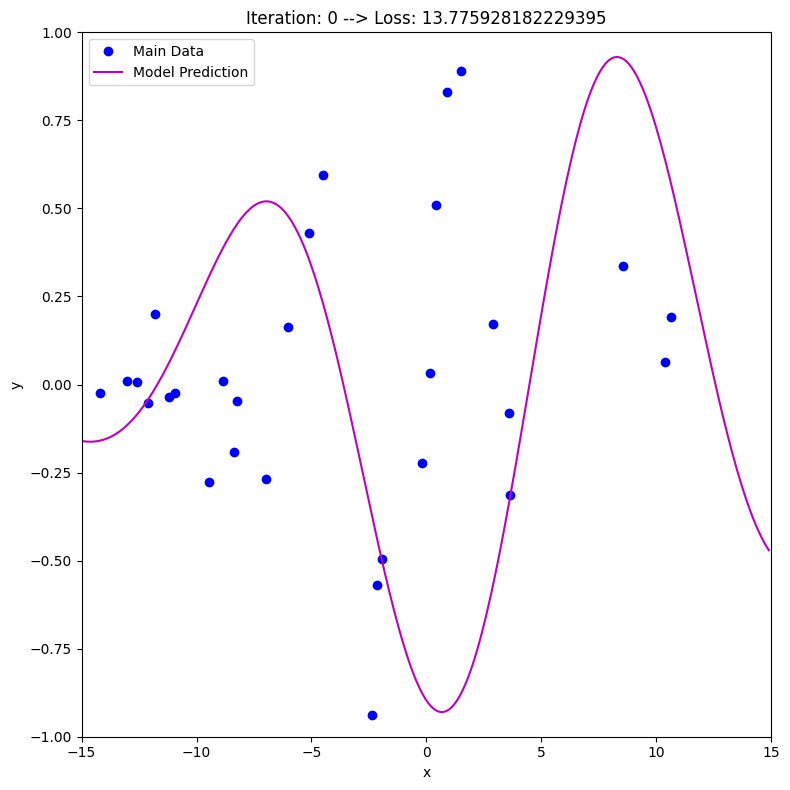

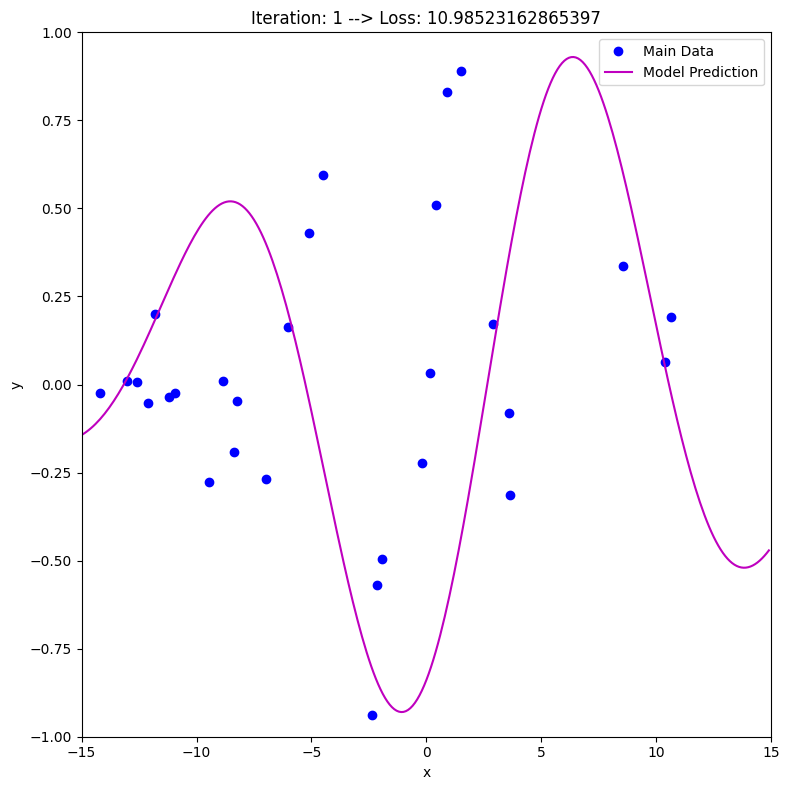

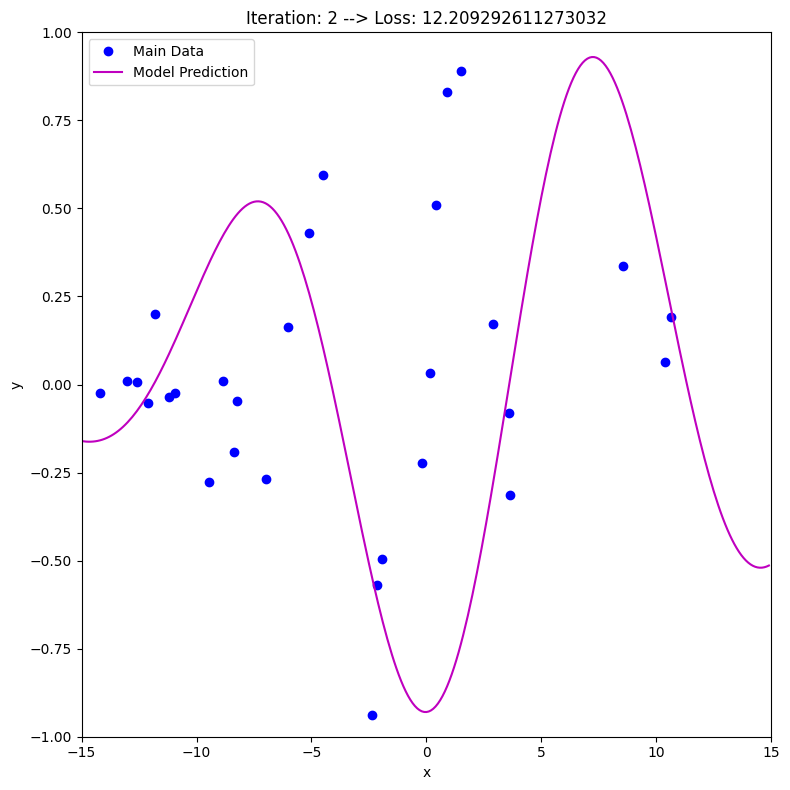

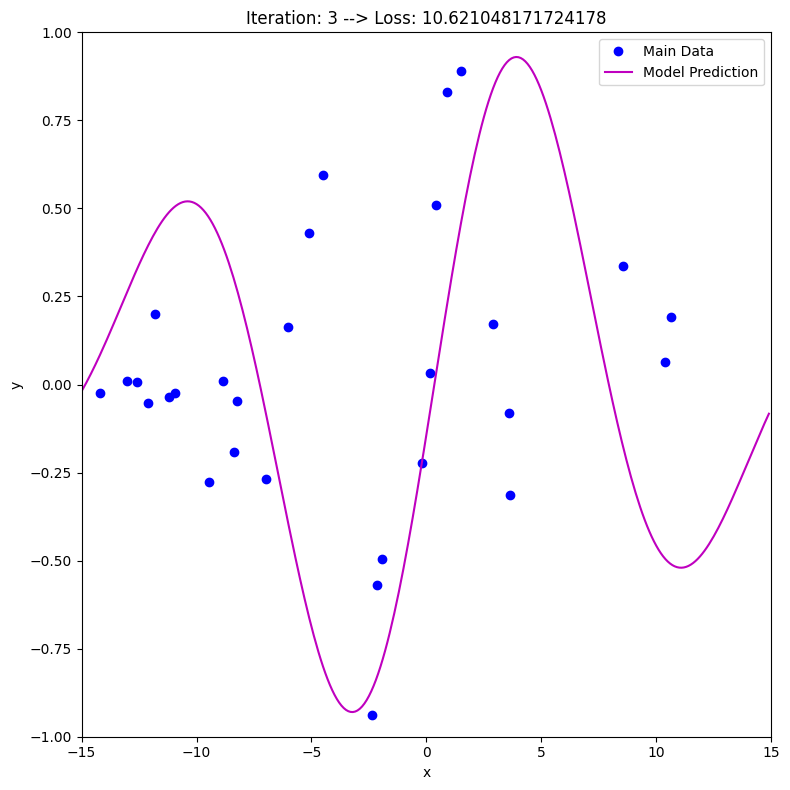

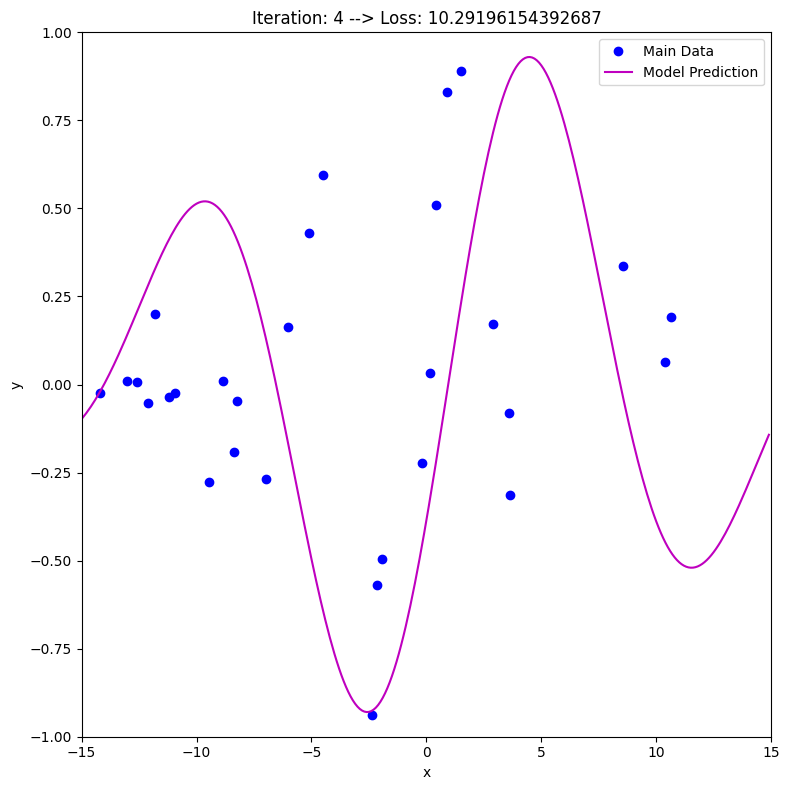

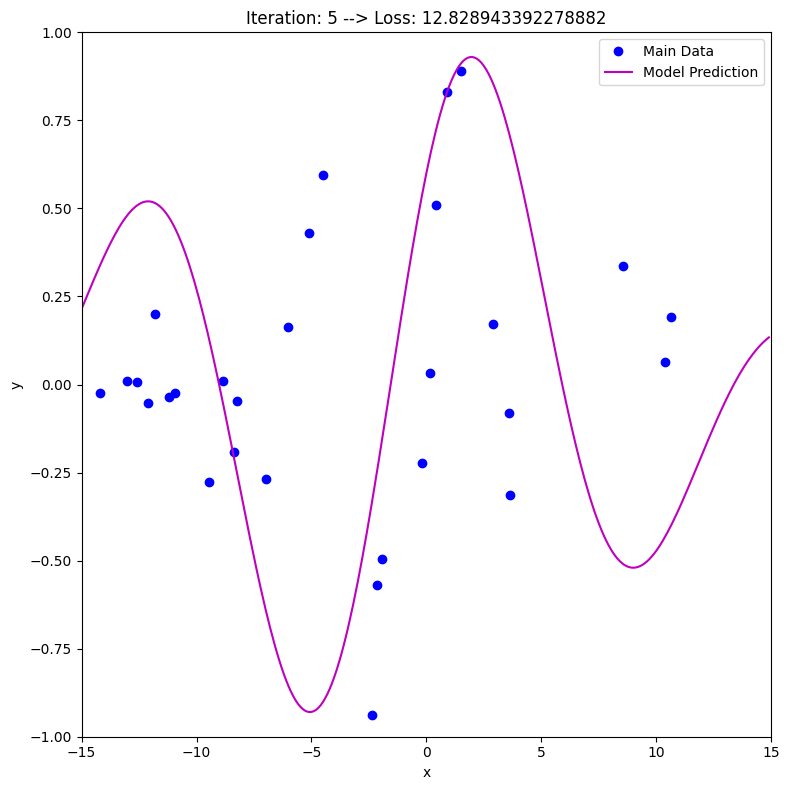

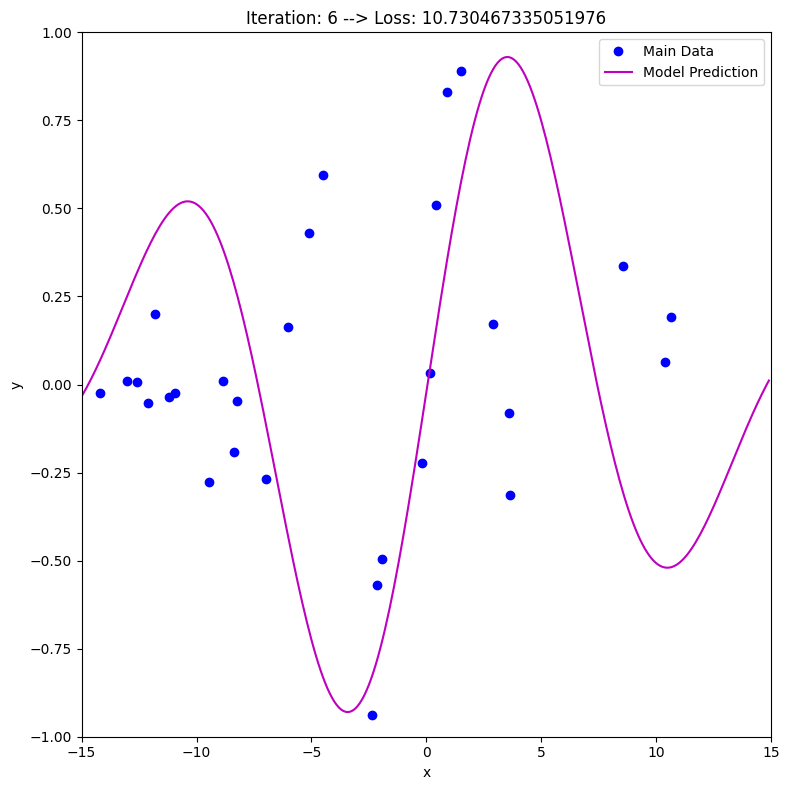

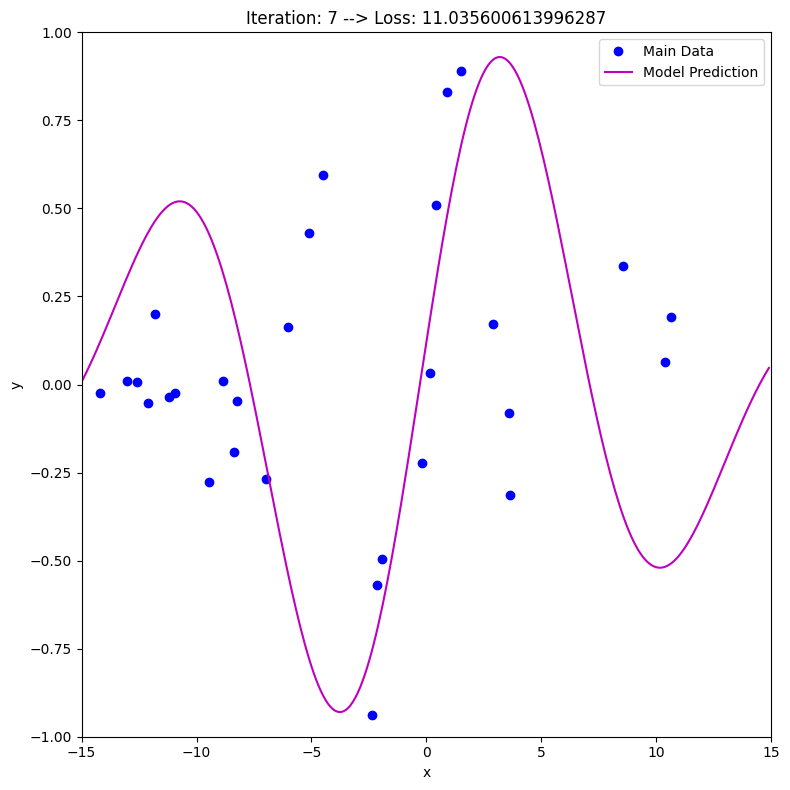

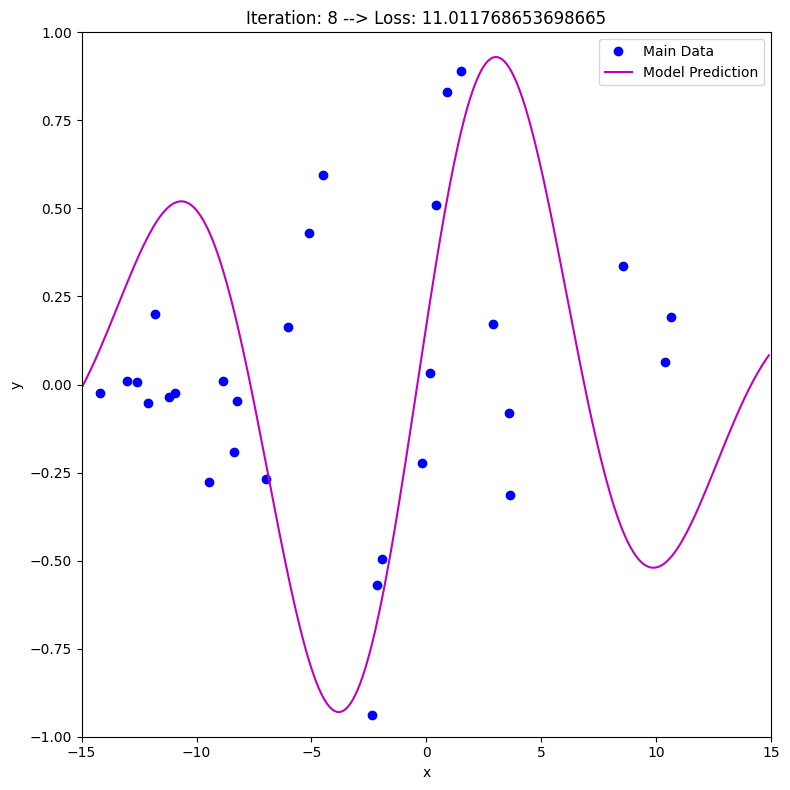

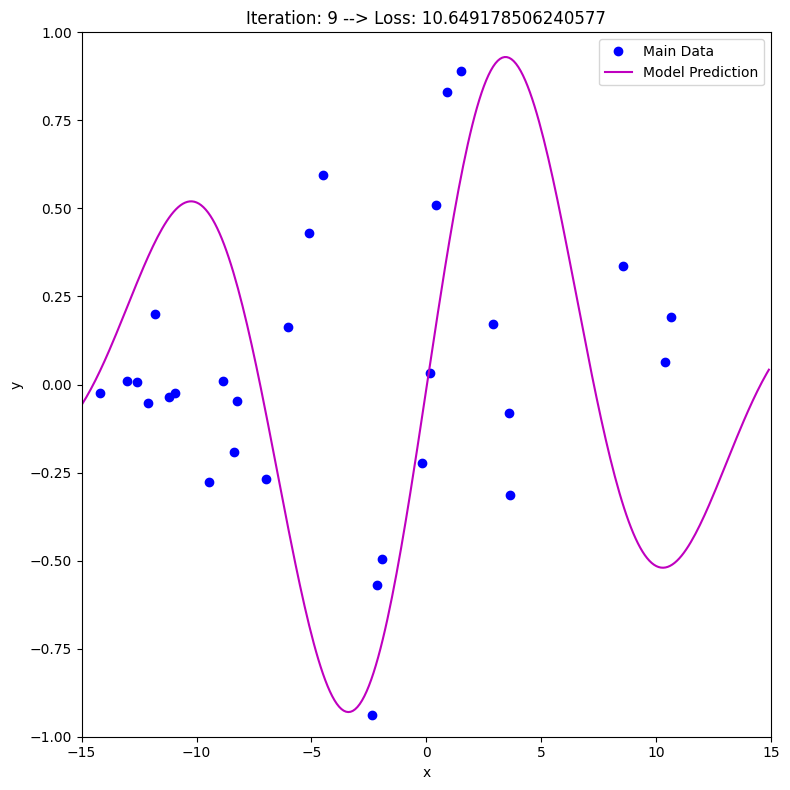

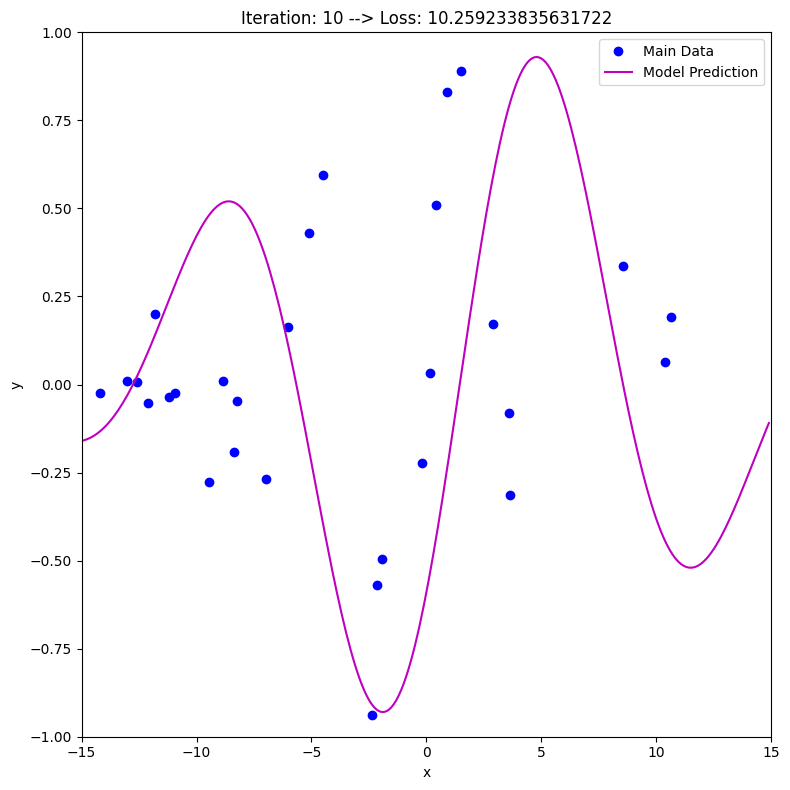

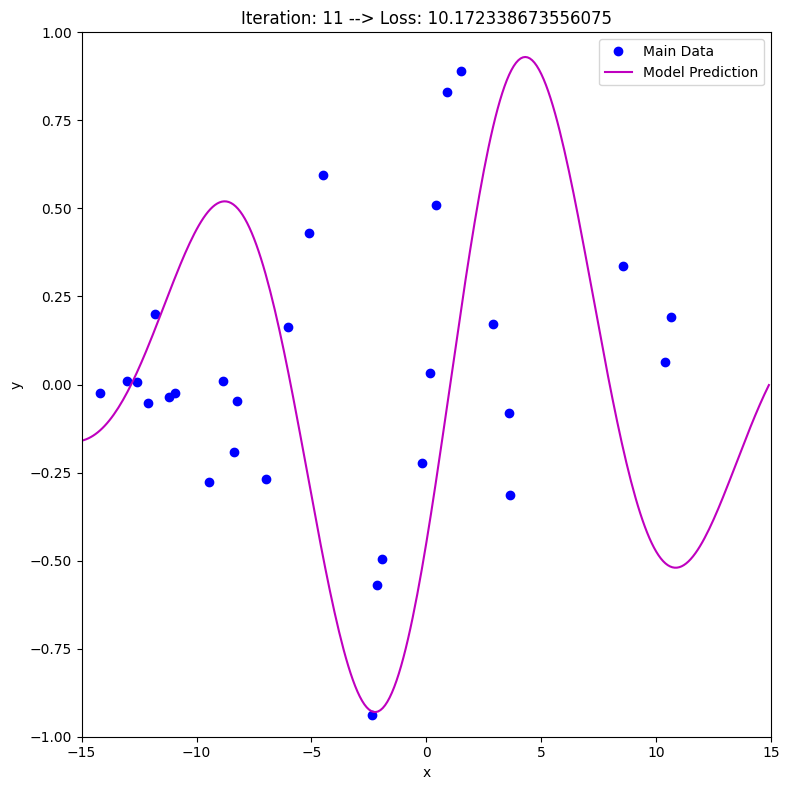

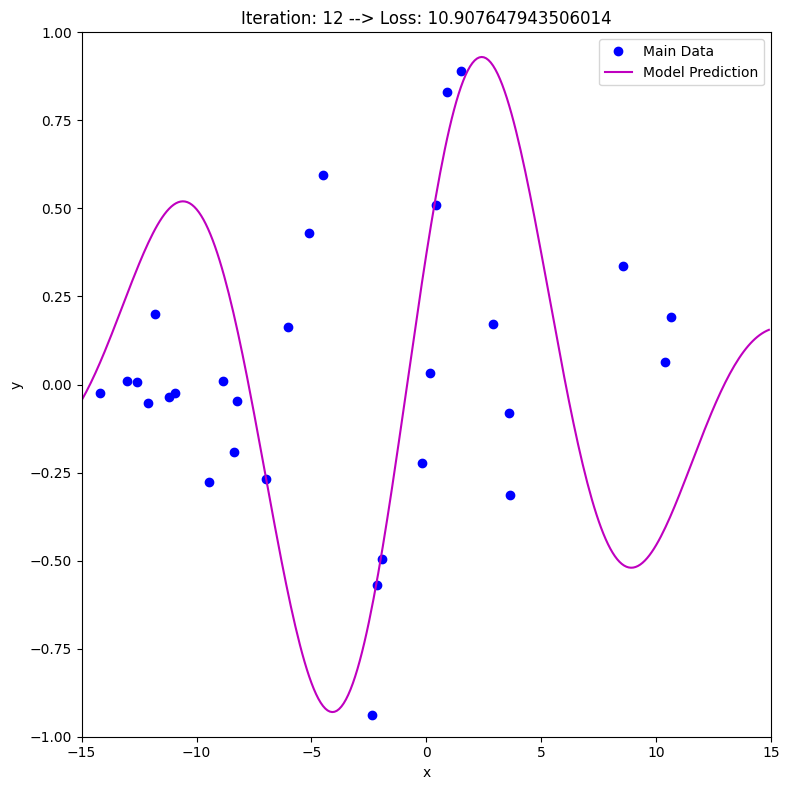

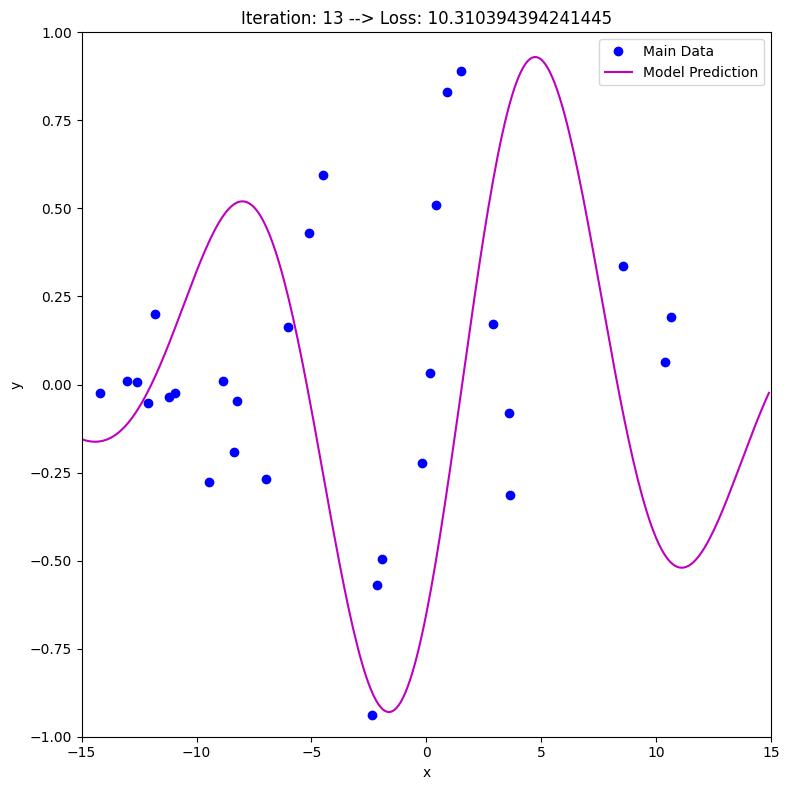

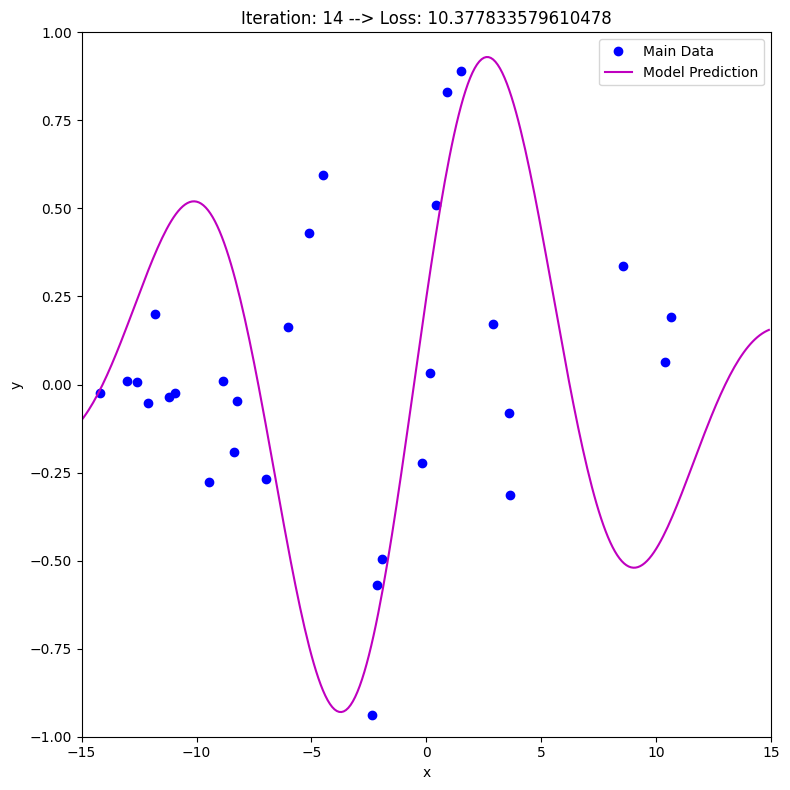

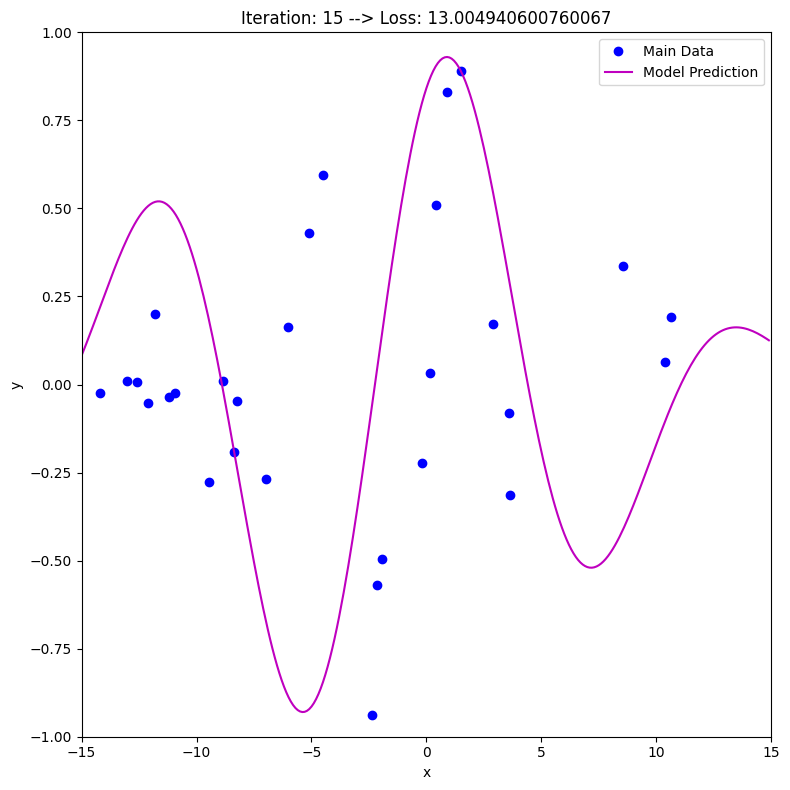

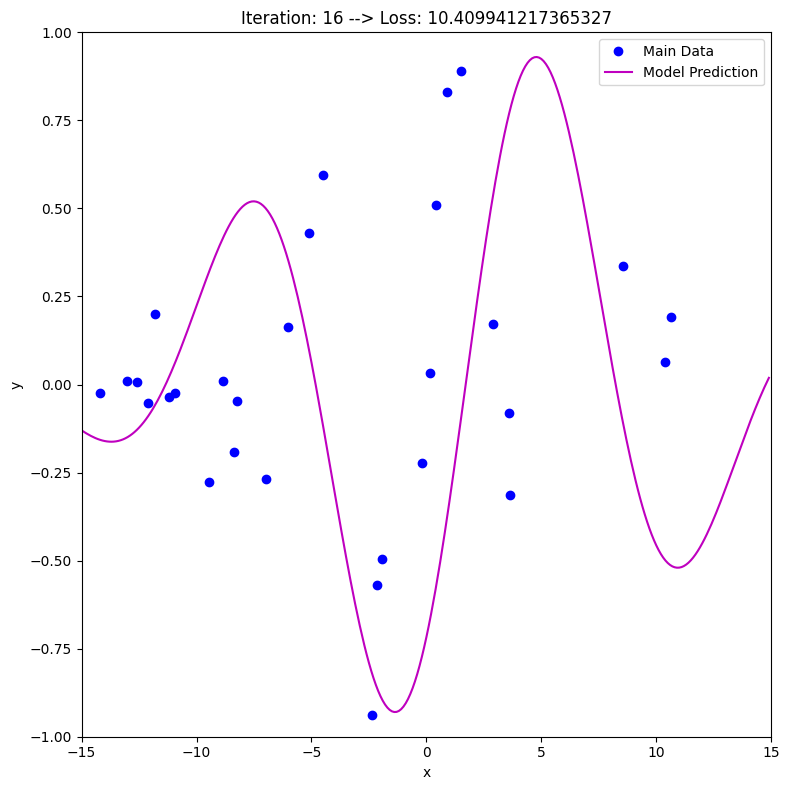

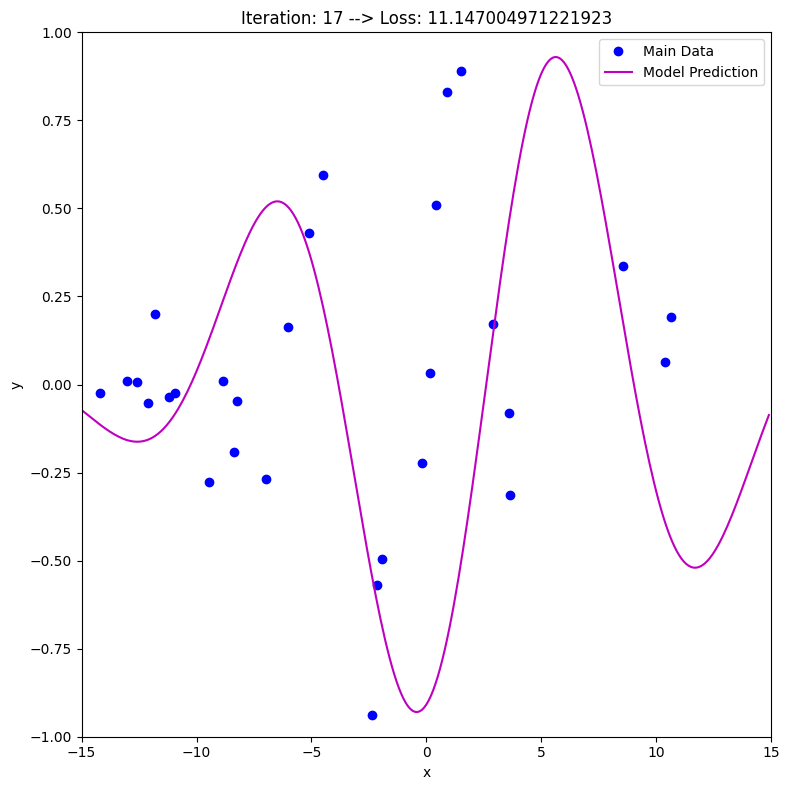

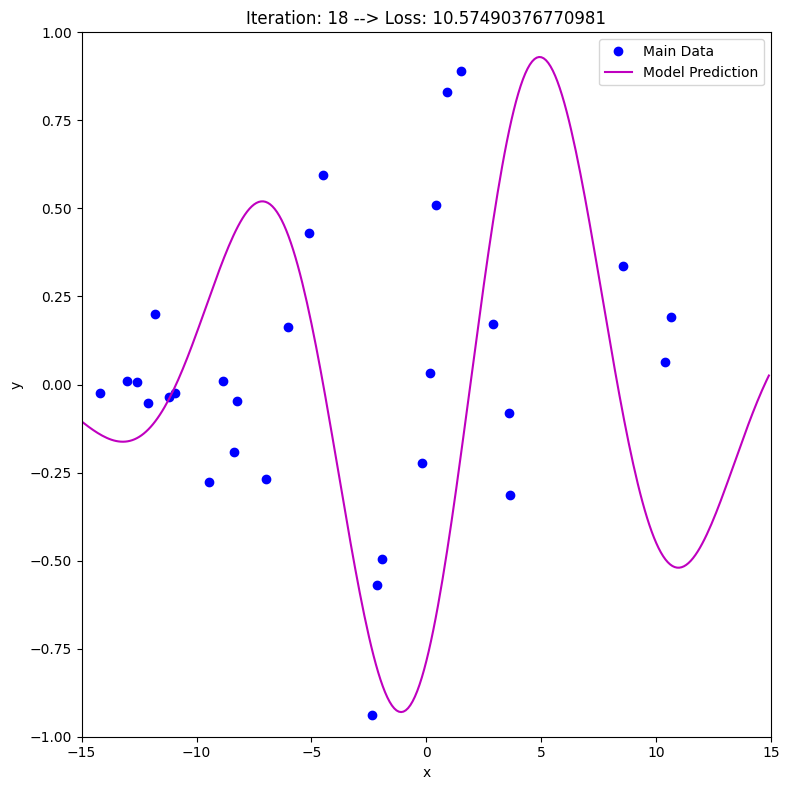

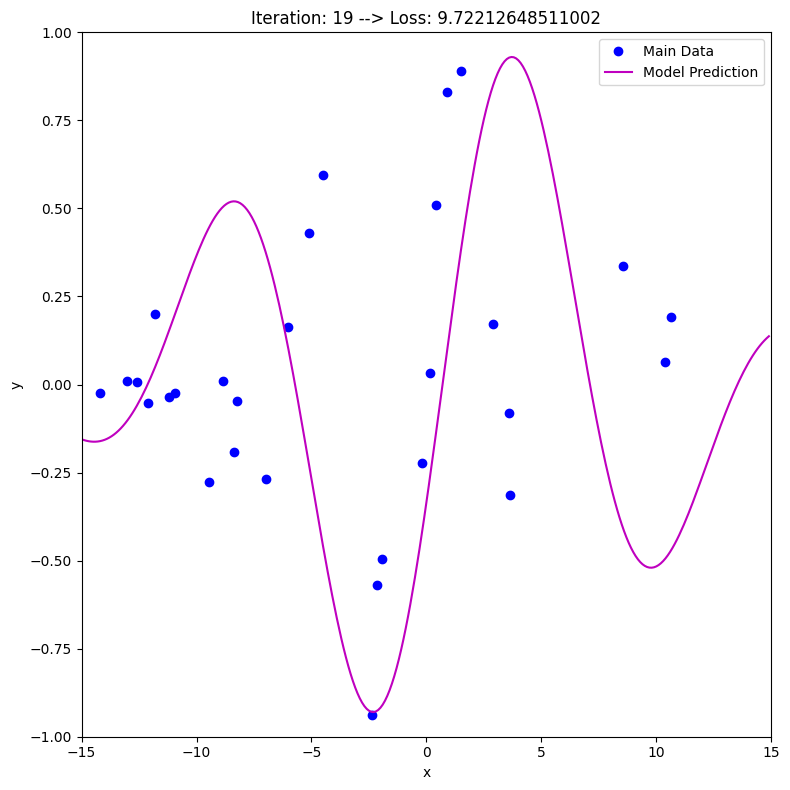

In [54]:
for idx in range(steps):
  batchIdx = np.random.permutation(sample.shape[1])[0:batchSize]
  gradient = ComputeGradient(sample[0,batchIdx],sample[1,batchIdx],phiAll[:,idx:idx+1])
  phiAll[:,idx+1:idx+2] = phiAll[:,idx:idx+1]-alpha*gradient
  loss = ComputeLoss(sample[0,:],sample[1,:],ModelPrediction,phiAll[:,idx+1:idx+2])
  DrawModel(sample,ModelPrediction,phiAll[:,idx+1],f"Iteration: {idx} --> Loss: {loss}")

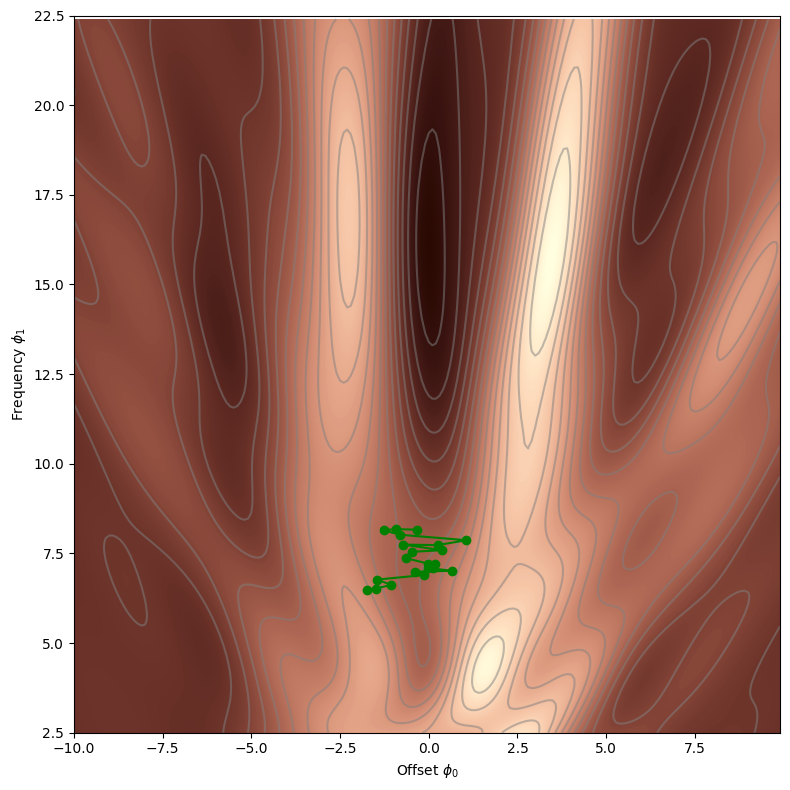

In [55]:
DrawLossFunctions(ComputeLoss,sample,ModelPrediction,phiAll)

In [61]:
np.random.seed(1)
steps = 20
batchSize = 5
alpha = 0.6
beta = 0.01
momentum = np.zeros([2,1])
phiAll = np.zeros((2,steps+1))
phiAll[0,0] = -1.5
phiAll[1,0] = 6.5

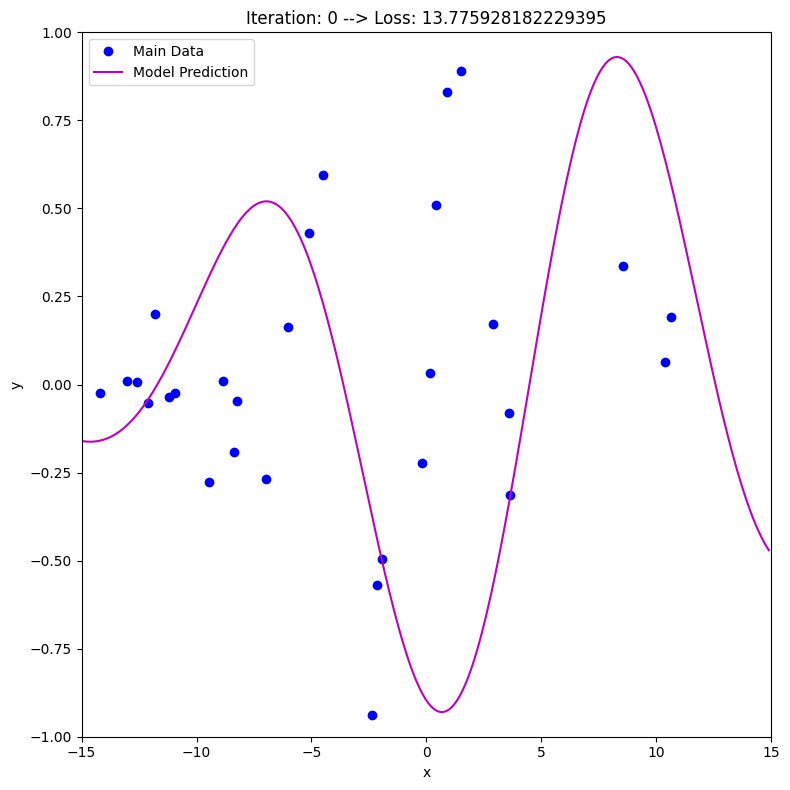

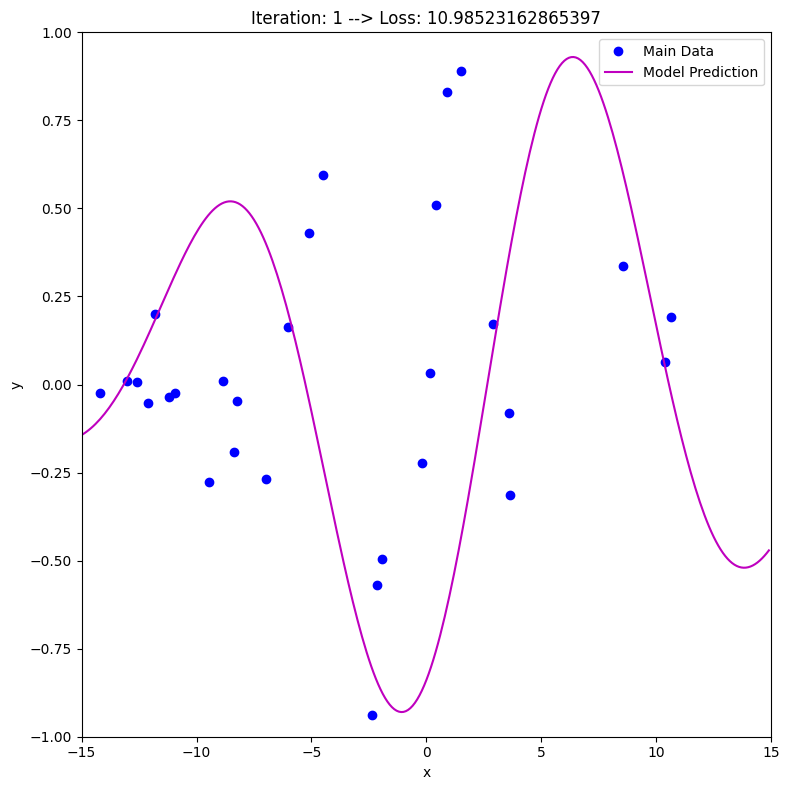

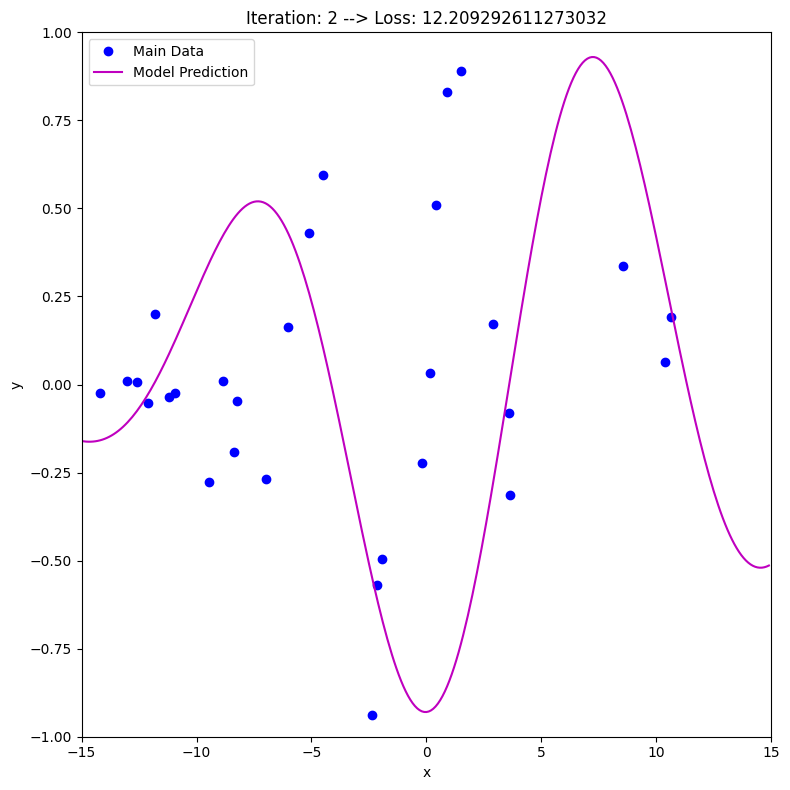

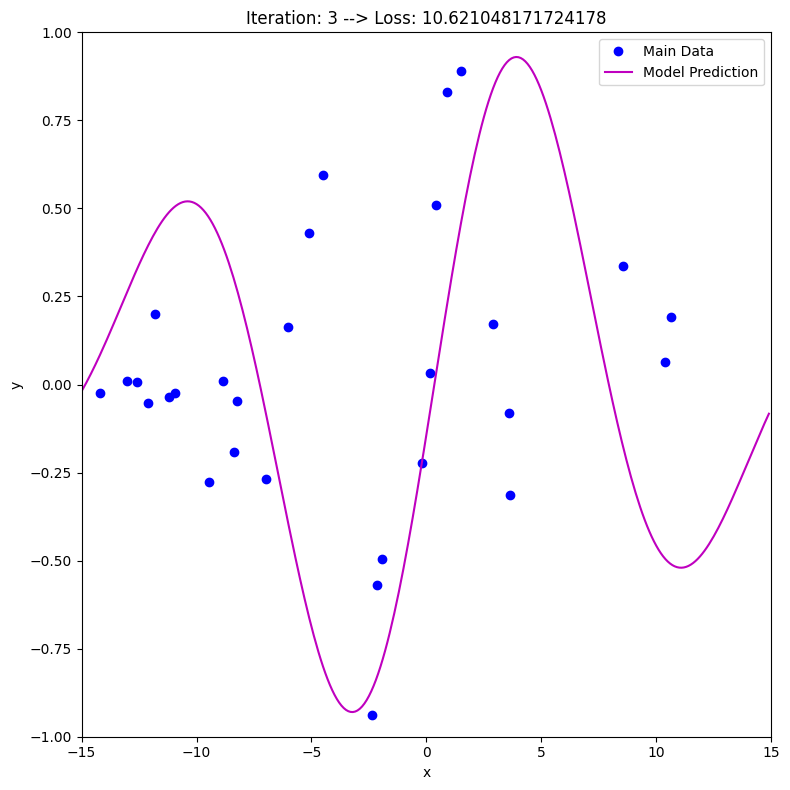

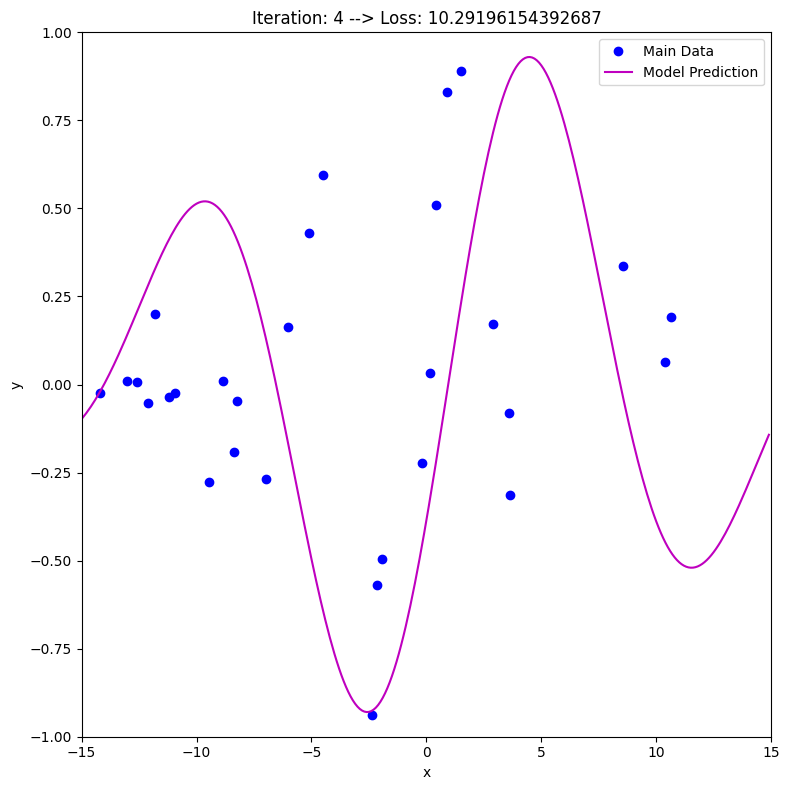

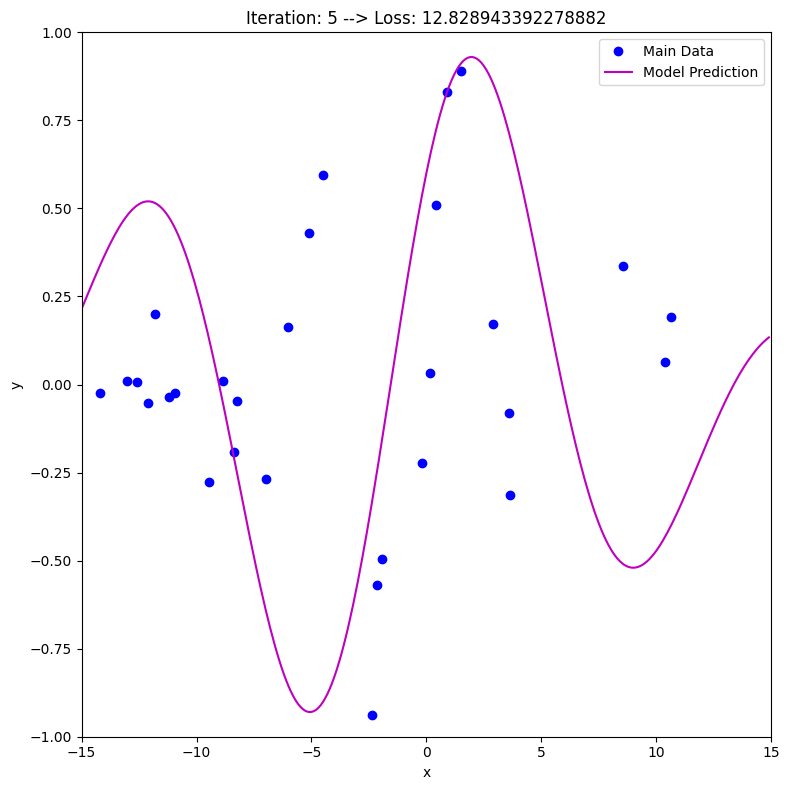

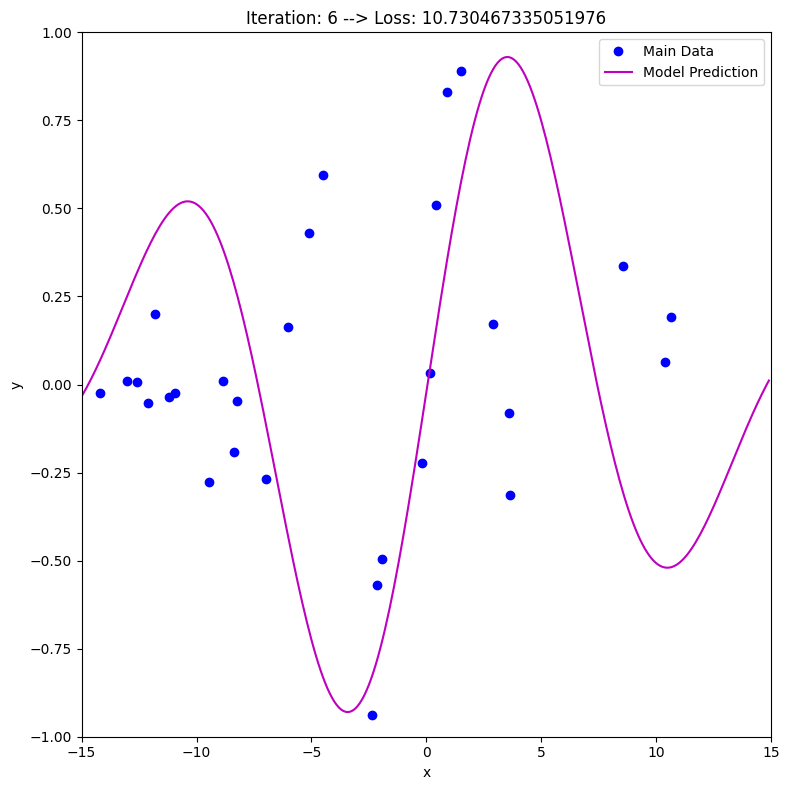

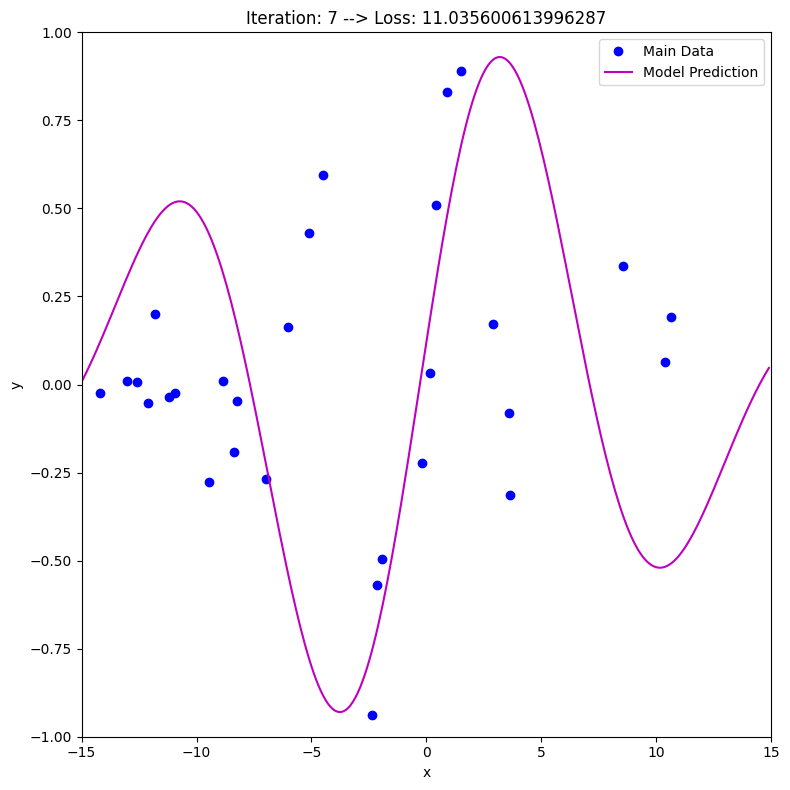

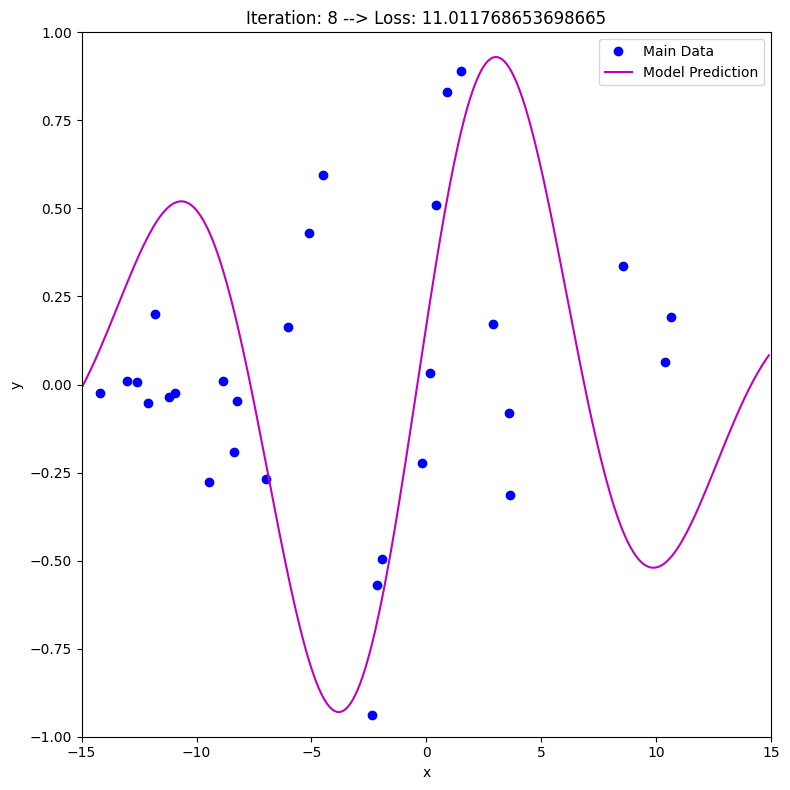

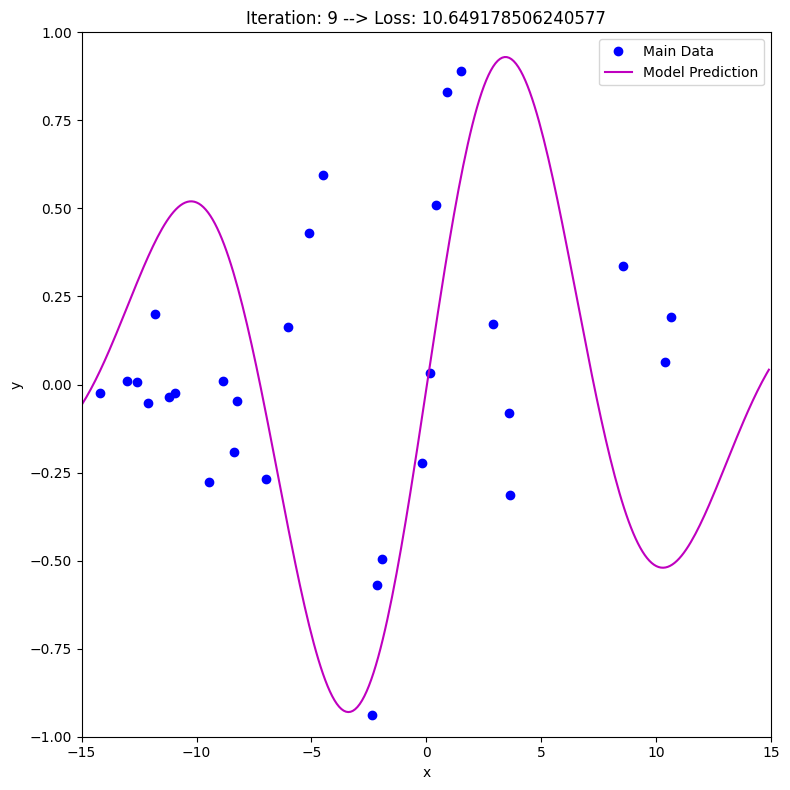

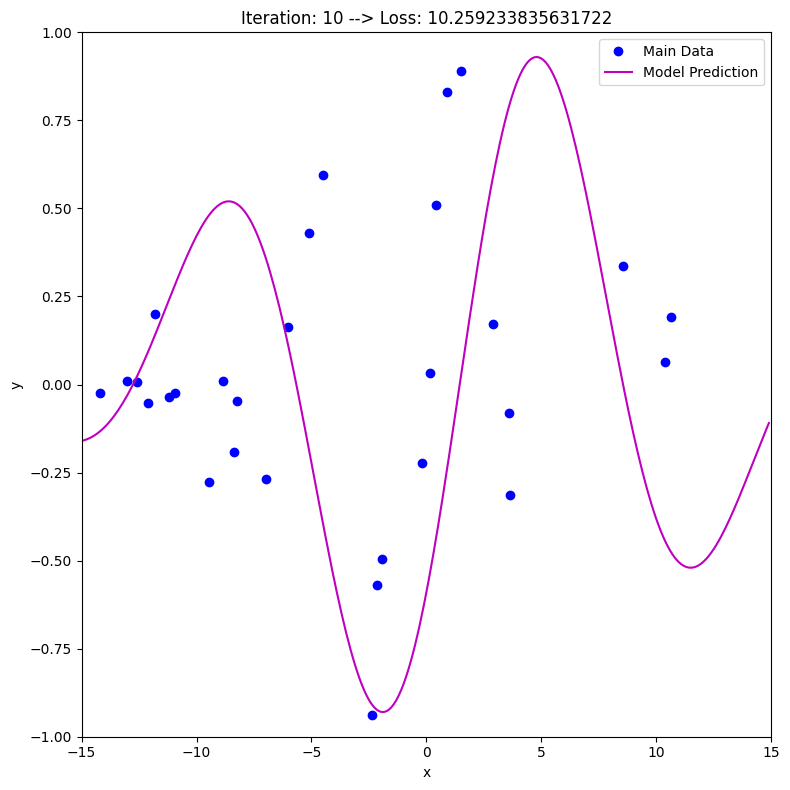

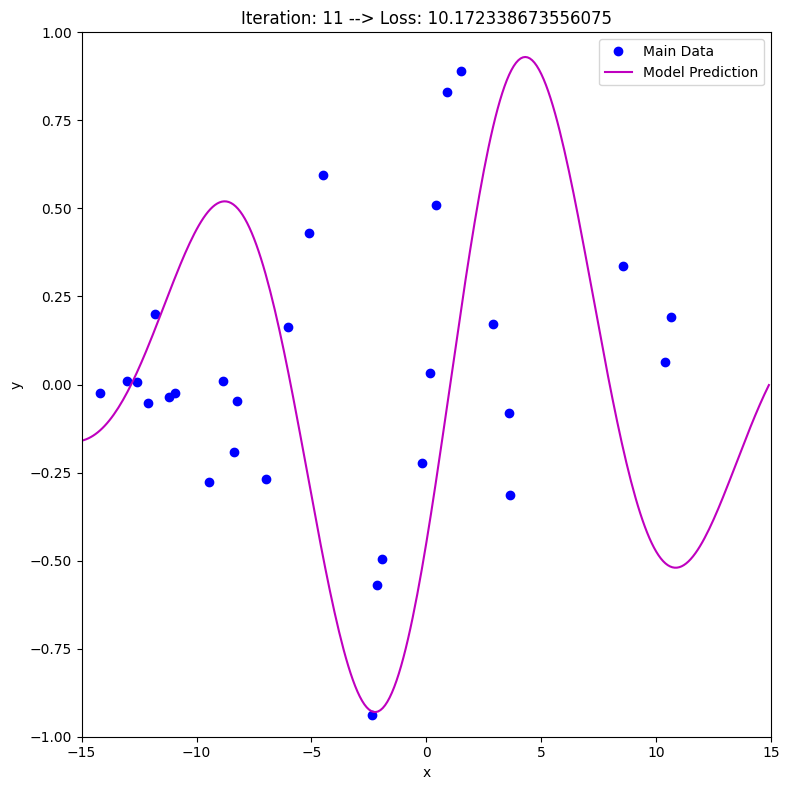

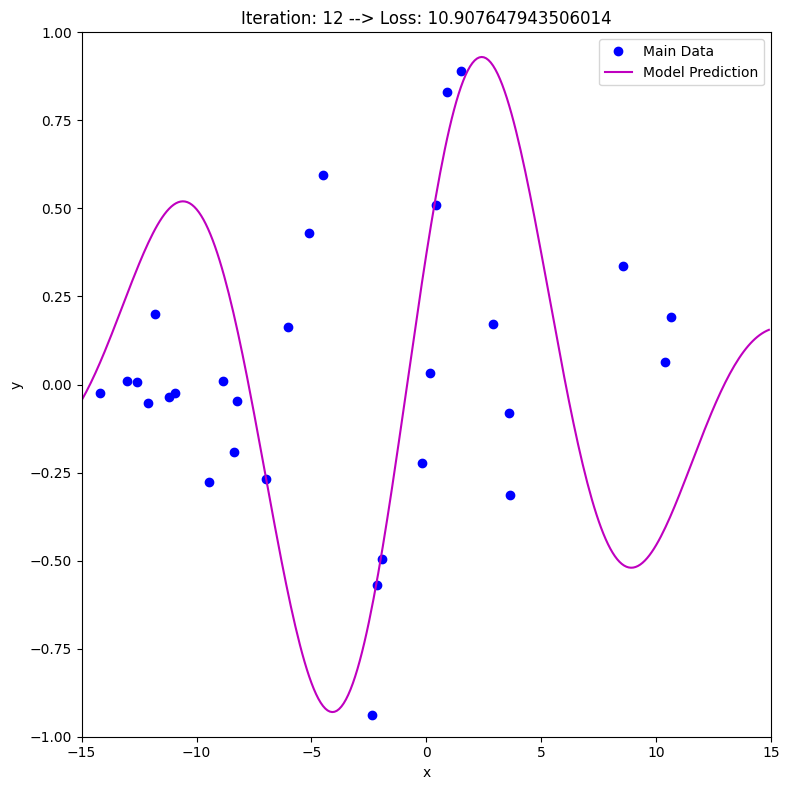

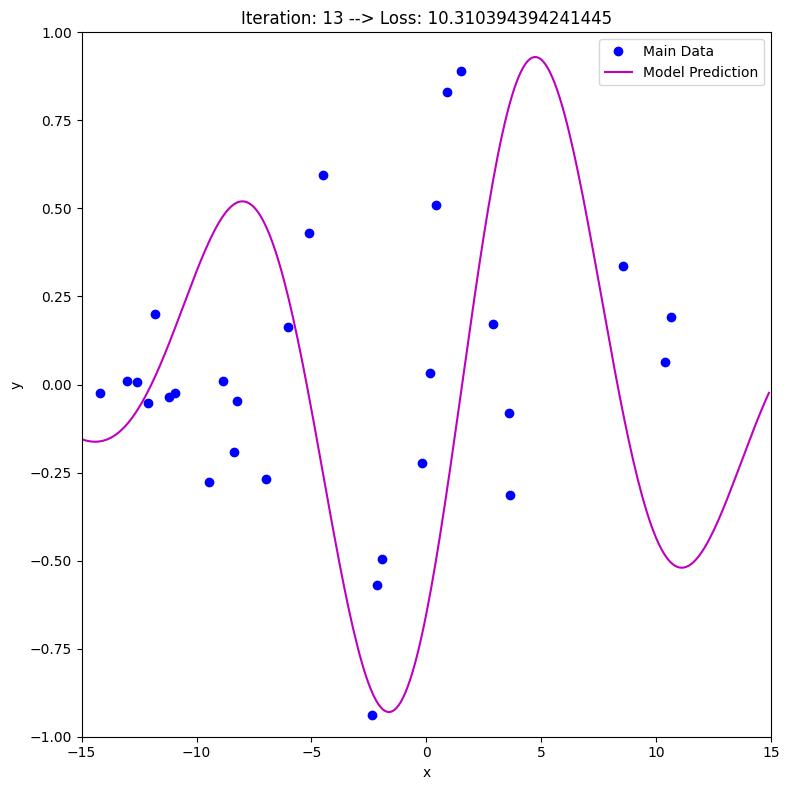

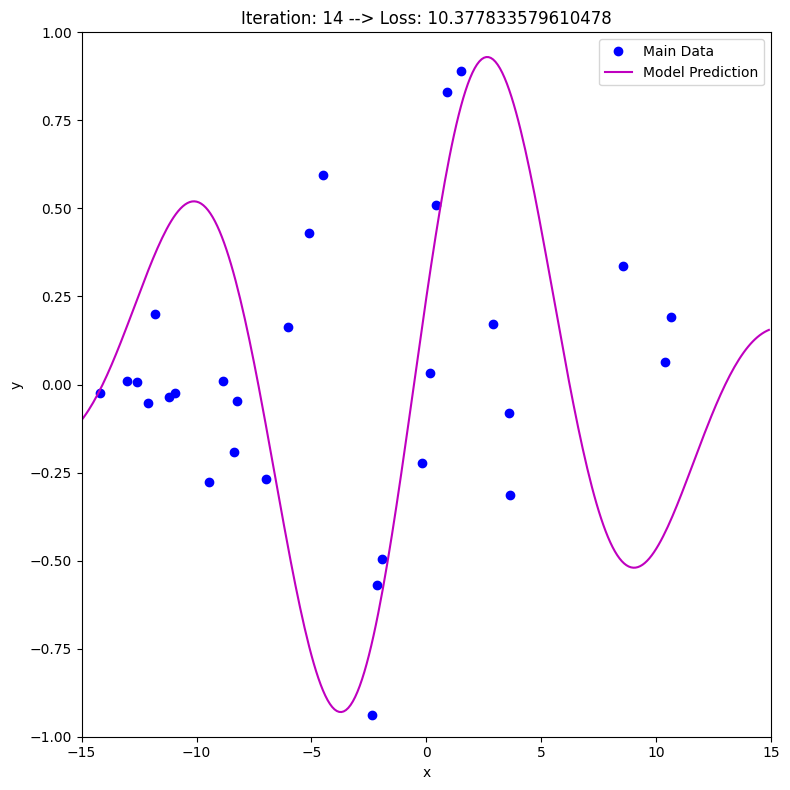

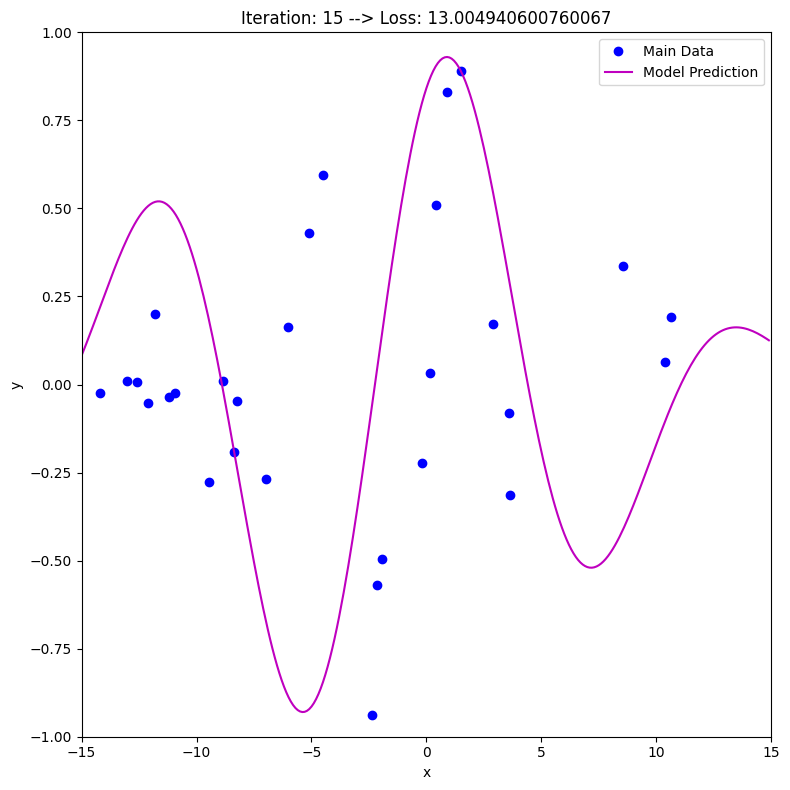

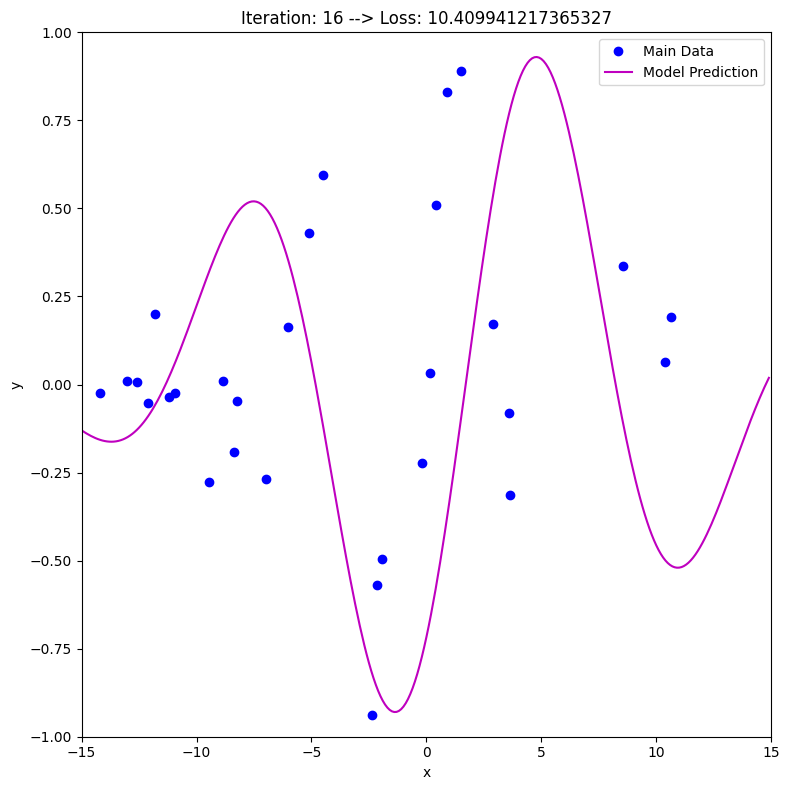

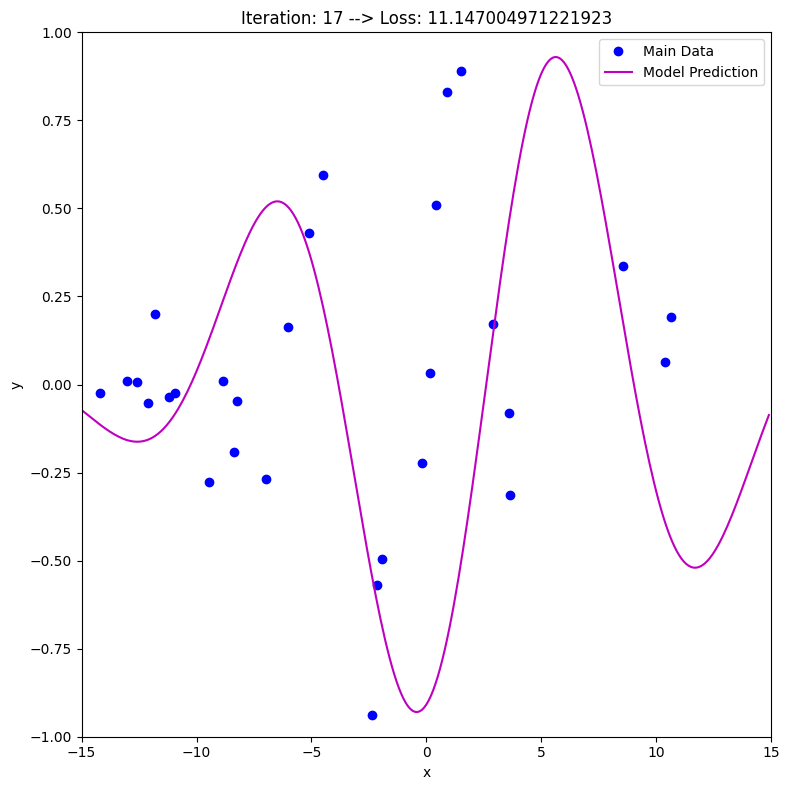

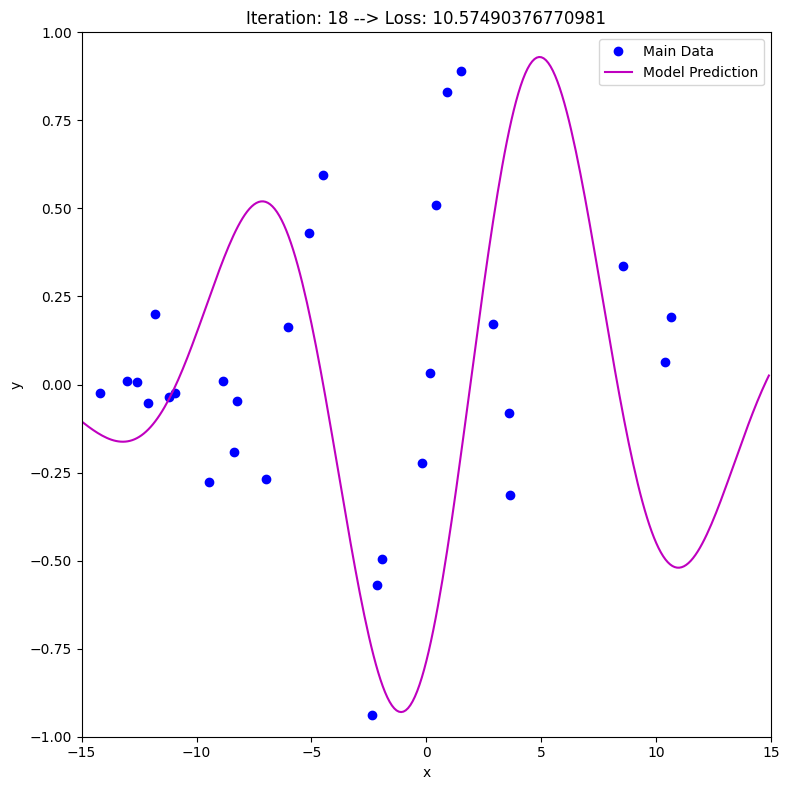

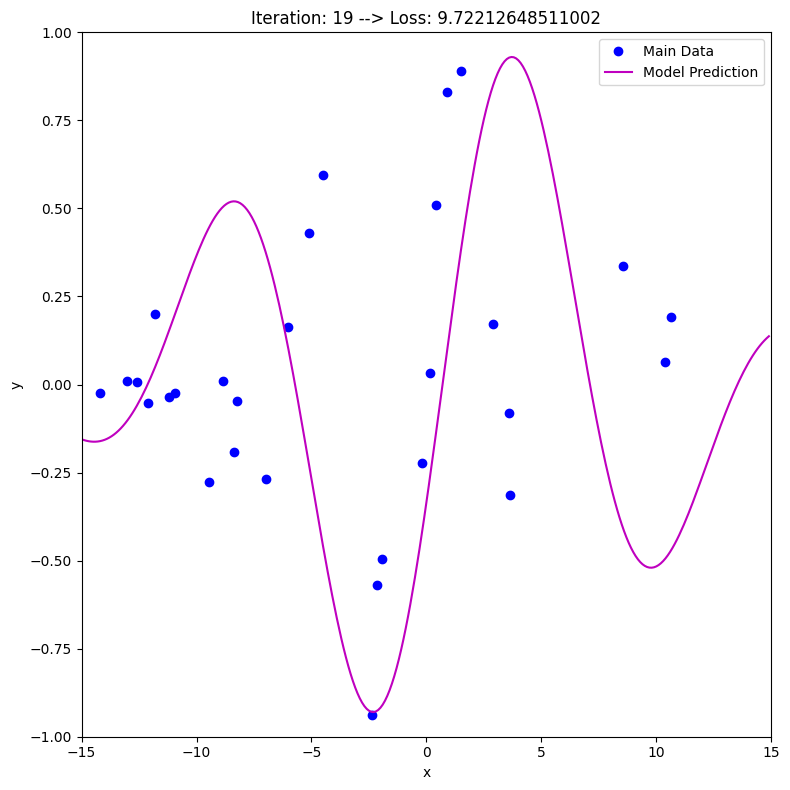

In [62]:
for idx in range(steps):
  batchIdx = np.random.permutation(sample.shape[1])[0:batchSize]
  batchSample = sample[0,batchIdx]
  batchGround = sample[1,batchIdx]
  gradient = np.zeros([2,1])
  momentum = np.zeros([2,1])
  tempPhi = phiAll[:,idx:idx+1]-beta*momentum
  gradient = ComputeGradient(batchSample,batchGround,tempPhi)
  momentum = beta*momentum+alpha*gradient
  phiAll[:,idx+1:idx+2] = phiAll[:,idx:idx+1]-momentum
  loss = ComputeLoss(sample[0,:],sample[1,:],ModelPrediction,phiAll[:,idx+1:idx+2])
  DrawModel(sample,ModelPrediction,phiAll[:,idx+1],f"Iteration: {idx} --> Loss: {loss}")

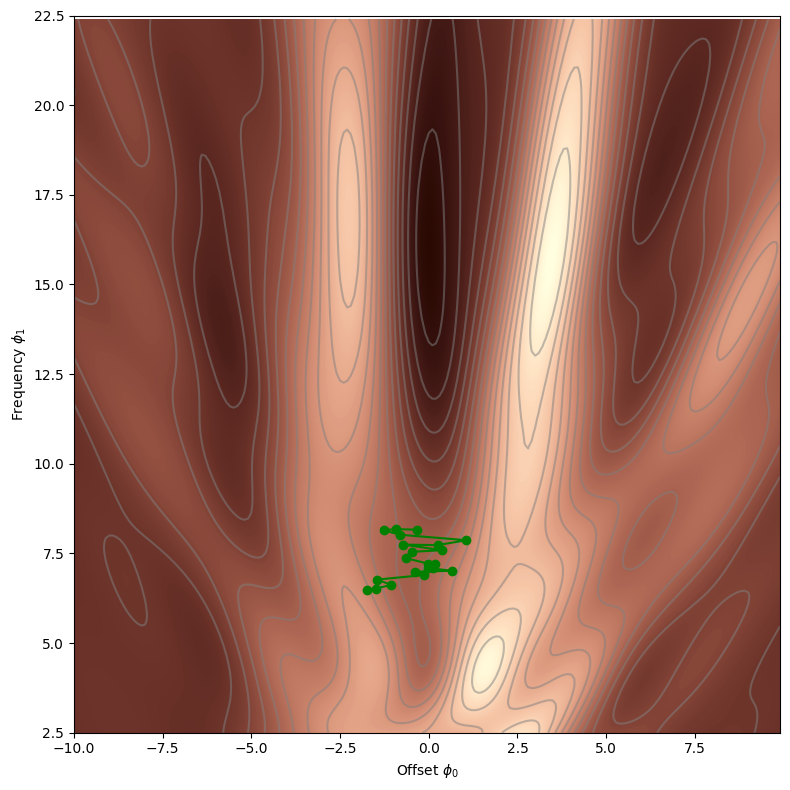

In [63]:
DrawLossFunctions(ComputeLoss,sample,ModelPrediction,phiAll)